In [230]:
import os
os.environ['TORCHVISION_DATA_URL'] = 'https://mirrors.aliyun.com/pytorch/vision/'  # 阿里云镜像
import torchvision
import torchvision.transforms as transforms
mnist=torchvision.datasets.FashionMNIST(root='D:\数据集',   # 数据存储路径（默认会创建./data目录）
    train=True,             # 加载训练集（False则加载测试集）
    download=True,          # 如果本地不存在，自动下载
    transform=transforms.ToTensor()     # 应用预处理
)


In [231]:
mnist#对数据说明

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: D:\数据集
    Split: Train
    StandardTransform
Transform: ToTensor()

In [232]:
len(mnist)

60000

In [233]:
mnist.data.shape#形状 图像结构：[样本数，Height，width,color]

torch.Size([60000, 28, 28])

In [234]:
mnist.targets.unique()#分类类别

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [235]:
mnist.classes#标签对应大的类别

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [236]:
mnist[0][0].shape


torch.Size([1, 28, 28])

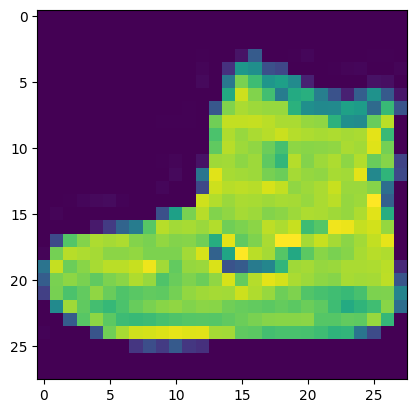

In [237]:
import matplotlib.pyplot as plt
import numpy
plt.imshow(mnist[0][0].view(28,28).numpy())

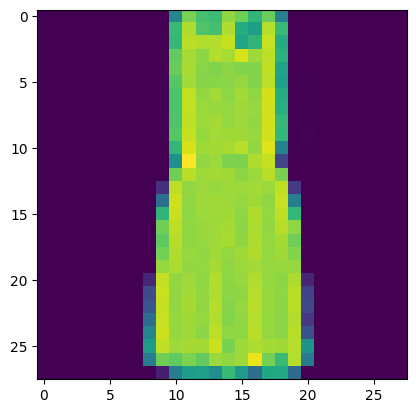

In [238]:

plt.imshow(mnist[30000][0].view(28,28).numpy())

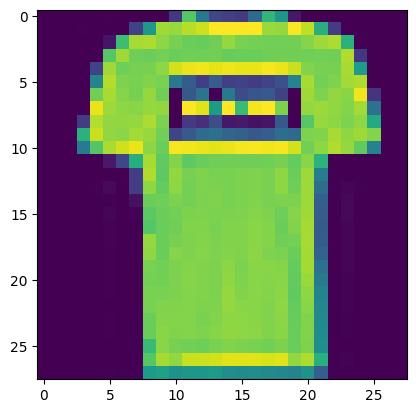

In [239]:
plt.imshow(mnist[1][0].view(28,28).numpy())

In [ ]:
#TensorDataset 不需要
#小批量划分

import torch  # 导入PyTorch核心库，提供张量计算、自动微分（autograd）和GPU加速支持
from torch import nn  # 导入神经网络模块，包含各种层（如Linear, Conv2d）、激活函数（如ReLU）和损失函数（如CrossEntropyLoss）
from torch import optim  # 导入优化算法模块，包含SGD、Adam等优化器，用于训练时更新模型参数
from torch.nn import functional as F  # 导入函数式接口，提供无状态的神经网络操作（如F.relu, F.softmax），常用于自定义前向传播逻辑
from torch.utils.data import DataLoader, TensorDataset  # 数据加载工具：
    # - DataLoader：实现批量加载、数据打乱和多线程加速
    # - TensorDataset：将输入张量和标签打包成数据集对象，便于与DataLoader配合
import torchvision  # 导入计算机视觉库，提供：
    # - 预训练模型（如ResNet, VGG）
    # - 公开数据集（如FashionMNIST, CIFAR10）
    # - 图像变换工具（transforms模块）
import torchvision.transforms as transforms # 导入图像预处理模块，包含数据增强和标准化方法：
    # - ToTensor()：将PIL图像或NumPy数组转为PyTorch张量，并自动归一化到[0,1]
    # - Normalize()：用均值和标准差标准化数据
    # - RandomCrop()：随机裁剪（数据增强）

# **超参数作用总结**

| 超参数   | 典型范围  | 作用                           | 调整建议                             |
| :------- | :-------- | :----------------------------- | :----------------------------------- |
| `lr`     | 0.001~0.1 | 控制参数更新步长               | 从0.01开始，观察损失曲线调整         |
| `gamma`  | 0.1~0.9   | 学习率衰减速度                 | 0.8~0.9适用于多数任务                |
| `epochs` | 10~100+   | 决定模型训练多久               | 根据验证集性能早停（Early Stopping） |
| `bs`     | 32~256    | 影响梯度估计的稳定性和显存占用 | 在显存允许范围内尽可能调大           |


In [241]:
#1.设置超参数
lr=0.15
gamma=0.8
epochs=3
bs=128


# torchvision.datasets.FashionMNIST 的参数作用说明

| 参数名          | 取值示例                | 作用说明                                                 | 注意事项                                               |
| :-------------- | :---------------------- | :------------------------------------------------------- | :----------------------------------------------------- |
| **`root`**      | `'D:\数据集'`           | 数据集存储的根目录路径。若目录不存在会自动创建。         | 建议使用英文路径，避免因中文或特殊符号导致读取失败。   |
| **`train`**     | `True`/`False`          | 选择加载训练集（`True`）还是测试集（`False`）。          | 训练集通常用于模型训练，测试集用于评估性能。           |
| **`download`**  | `True`/`False`          | 如果本地路径不存在数据集，是否自动从网络下载（需联网）。 | 首次运行建议设为 `True`，后续可设为 `False` 加速加载。 |
| **`transform`** | `transforms.ToTensor()` | 指定数据预处理操作（如转为张量、归一化等）。             |                                                        |

In [242]:
#2.导入数据
mnist=torchvision.datasets.FashionMNIST(root='D:\数据集' , # 数据存储路径（默认会创建./data目录）
    train=True,             # 加载训练集（False则加载测试集）
    download=True,          # 如果本地不存在，自动下载
    transform=transforms.ToTensor()     # 应用预处理
)


 # DataLoader 核心参数
| **参数**      | **类型** | **默认值** | **说明**                               |
| ------------- | -------- | ---------- | -------------------------------------- |
| `dataset`     | Dataset  | -          | 要加载的数据集（如TensorDataset）      |
| `batch_size`  | int      | 1          | 每个批次的样本数量                     |
| `shuffle`     | bool     | False      | 是否在每个epoch开始时打乱数据          |
| `num_workers` | int      | 0          | 用于数据加载的子进程数（0=主进程加载） |
| `drop_last`   | bool     | False      | 是否丢弃最后一个不完整的批次           |

---



In [243]:
#分割
batchdata=DataLoader(mnist,batch_size=bs,shuffle=True)
#确定结构？
for x,y in batchdata:
    print(x.shape)
    print(y.shape)
    break 

torch.Size([128, 1, 28, 28])
torch.Size([128])


### 1. `input_ = mnist.data[0].numel()`

**MNIST 数据集结构**：

- MNIST 是一个手写数字数据集，包含 60,000 张训练图片和 10,000 张测试图片
- 每张图片都是 28 像素高 × 28 像素宽的灰度图像

**`mnist.data[0]`**：

- 这是获取数据集中的第一张图片

- 图片以 PyTorch 张量的形式存储，形状为

   

  ```
  [1, 28, 28]
  ```

  ：

  - `1` 表示单通道（灰度图像，没有 RGB 三个通道）
  - `28, 28` 表示图片的高度和宽度

**`.numel()`**：

- 这是 PyTorch 张量的一个方法，计算张量中元素的总数
- 对于 `[1, 28, 28]` 的图片，元素总数 = 1 × 28 × 28 = 784
- 所以 `input_ = 784` 表示每张图片有 784 个像素点

**为什么需要这个值**：

- 在构建神经网络时，特别是全连接层（Dense Layer），我们需要知道输入特征的维度
- 784 就是我们将图片"展平"后的向量长度（把 28×28 的图片拉直成 784 长的一维向量）

### 2. `output_ = len(mnist.targets.unique())`

**MNIST 标签**：

- 每张图片都有一个对应的标签，表示图片中手写的数字是什么（0-9）
- 这些标签存储在 `mnist.targets` 中

**`mnist.targets.unique()`**：

- 这会返回所有不重复的标签值
- 对于 MNIST，这些值是 `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`

**`len(...)`**：

- 计算不重复标签的数量
- MNIST 有 10 个不同的数字类别，所以长度是 10
- 因此 `output_ = 10` 表示我们有 10 个可能的输出类别

**为什么需要这个值**：

- 在分类任务中，我们需要知道输出层的维度
- 输出层需要有 10 个神经元，每个对应一个数字类别
- 模型最后会输出一个 10 维的向量，表示图片属于每个数字的概率

### 总结

- `input_ = 784`：因为每张 28×28 的图片有 784 个像素点
- `output_ = 10`：因为我们需要识别 0-9 共 10 个不同的数

In [244]:
# x-四维：（128，28*28）
input_=mnist.data[0].numel()#特征个数
input_

784

In [245]:
output_=len(mnist.targets.unique())
output_

10

- **ReLU** 用于隐藏层，因为它提供了非线性性、计算效率和良好的训练特性。
- **log_softmax** 用于输出层，因为它提供了数值稳定性，并且与 NLLLoss 结合使用能够有效地进行分类任务的训练。
**输入数据的形状通常需要与网络的输入层相匹配**：对于全连接层（`nn.Linear`），输入数据需要是一个二维张量，其中第一维是批量大小，第二维是特征数量。

### **为什么需要展平输入？**

1. 全连接层的输入要求

   

   - 全连接层（`nn.Linear`）期望输入是一个二维张量，形状为 `(batch_size, num_features)`，其中 `num_features` 是输入特征的数量。
   - 图像数据通常是三维的（对于灰度图像，形状为 `(batch_size, channels, height, width)`），例如，FashionMNIST 图像的形状是 `(batch_size, 1, 28, 28)`。

2. 展平操作

   

   - `x.view(-1, 28*28)` 将每个图像从形状 `(1, 28, 28)` 展平为形状 `(784,)`，即把二维的图像数据转换为一维的向量。
   - `-1` 表示自动计算批量大小，确保批量大小保持不变。

### 具体操作

- 假设输入 `x` 的形状是 `(128, 1, 28, 28)`，其中 `128` 是批量大小，`1` 是通道数（灰度图像），`28, 28` 是图像的高度和宽度。
- `x.view(-1, 28*28)` 将 `x` 转换为形状 `(128, 784)`，其中 `784` 是 `28 * 28`，即每个图像的像素数。
- 这样，每个图像就被展平为一个长度为 784 的向量，可以输入到全连接层中进行处理。


In [246]:
#3.定义神经网络的架构
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear1=nn.Linear(in_features,128,bias=False)
        self.output=nn.Linear(128,out_features,bias=False)
    def forward(self,x):
        x=x.view(-1,28*28) #-1是占位符
        sigma1=torch.relu(self.linear1(x))
        sigma2=F.log_softmax(self.output(sigma1),dim=1)
        return sigma2


# optim.SGD 优化器的参数和用法的知识点 #
| **参数/属性**          | **说明**                                                  | **示例/常用值**               | **注意事项**                                   |
| :--------------------- | :-------------------------------------------------------- | :---------------------------- | :--------------------------------------------- |
| **`net.parameters()`** | 传入待优化的模型参数（通过`model.parameters()`获取）      | `net.parameters()`            | 必须是可训练参数（`requires_grad=True`）       |
| **`lr`**               | 学习率（Learning Rate），控制参数更新步长                 | `lr=0.01`（默认） `lr=0.15`   | 过大易震荡，过小收敛慢；可配合学习率调度器调整 |
| **`momentum`**         | 动量因子，加速梯度下降并减少震荡                          | `momentum=0.9` `momentum=0.8` | 通常设为 `0.8~0.99`，0 时退化为普通 SGD        |
| **`weight_decay`**     | L2 正则化系数（权重衰减），防止过拟合                     | `weight_decay=0.001`          | 较大的值增强正则化效果，但可能欠拟合           |
| **`dampening`**        | 动量抑制因子（一般无需修改）                              | `dampening=0`（默认）         | 仅在 `momentum > 0` 时有效                     |
| **`nesterov`**         | 是否启用 Nesterov 动量（加速收敛）                        | `nesterov=True`               | 需 `momentum > 0` 时生效                       |
| **优化步骤**           | 1. `opt.zero_grad()` 2. `loss.backward()` 3. `opt.step()` | 必需按顺序执行                | 每次迭代前需清零梯度，避免累积                 |

------

### 

### **PyTorch Epoch 循环语法表格**

| **类型**             | **语法示例**                                                 | **说明**                                     |
| :------------------- | :----------------------------------------------------------- | :------------------------------------------- |
| **基础固定次数循环** | `python<br>for epoch in range(num_epochs):<br> train_model() # 自定义训练函数<br>` | 最简单的固定次数循环，`num_epochs`为总轮数。 |
| **带时间限制的循环** | `python<br>import time<br>start_time = time.time()<br>max_time = 3600 # 最大训练时间（秒）<br>while time.time() - start_time < max_time:<br> train_model()<br>` | 基于时间戳的循环，训练最多持续`max_time`秒。 |
| **带进度条（tqdm）** | `python<br>from tqdm import tqdm<br>for epoch in tqdm(range(num_epochs), desc="Training"):<br> train_model()<br>` | 使用`tqdm`显                                 |

for batch_idx, (inputs, labels) in enumerate(train_loader):
    # 训练代码

### **为什么需要调整标签 `y` 的形状？**

1. 标签数据的原始形状



   - 在许多数据加载器中，标签 `y` 可能是以二维张量的形式返回的，尤其是在数据集被设计为支持多任务学习或者有额外的结构时。例如，在 PyTorch 的某些数据集中，标签可能被加载为形状 `(batch_size, 1)` 的张量。

2. 损失函数的输入要求

   

   - 许多损失函数（例如 `nn.CrossEntropyLoss`）期望标签 `y` 是一个一维张量，形状为 `(batch_size,)`，其中每个元素是一个类别的索引。
   - 如果标签的形状不符合损失函数的期望，可能会导致错误或意外的行为。

3. `view(-1)` 的作用

   

   - `y.view(-1)` 将 `y` 展平为一个一维张量。
   - `-1` 是一个占位符，表示自动计算该维度的大小，以确保张量的总元素数保持不变。
   - 例如，如果 `y` 的形状是 `(batch_size, 1)`，`y.view(-1)` 将把它转换为形状 `(batch_size,)`。

####  `yhat = torch.max(sigma, 1)[1]`

- **`sigma`**：这是模型的输出，通常是一个形状为 `(batch_size, num_classes)` 的张量。例如，如果有 10 个类别和 32 个样本，`sigma` 的形状可能是 `(32, 10)`。
- **`torch.max(sigma, 1)`**：
  - `torch.max` 函数在指定的维度上找到最大值。
  - `1` 表示沿着第二个维度（即 `num_classes` 维度）进行操作。
  - `torch.max` 返回两个值：最大值和最大值的索引。
- **`[1]`**：
  - 通过 `[1]`，我们选择返回值的第二个部分，即最大值的索引。
  - 这些索引代表模型预测的类别，因为它们对应于每个样本的预测概率最高的类别。

**例子**：

假设 `sigma` 是：

```
[[0.1, 0.2, 0.7],  # 样本1的概率分布
 [0.8, 0.1, 0.1]]  # 样本2的概率分布
```

`torch.max(sigma, 1)` 将返回：

- 最大值：`[0.7, 0.8]`
- 最大值的索引：`[2, 0]`

所以 `yhat` 是 `[2, 0]`，表示模型预测第一个样本属于类别 2，第二个样本属于类别 0。

####  `correct += torch.sum(yhat == y).item()`

- `yhat == y`

  

  - `yhat` 是模型的预测类别。
  - `y` 是真实的类别标签。
  - `yhat == y` 是一个布尔运算，返回一个布尔张量，其中每个元素为 `True`（如果预测正确）或 `False`（如果预测错误）。

- `torch.sum(yhat == y)`

  

  - `torch.sum` 计算布尔张量中 `True` 的数量，即正确预测的数量。

- `.item()`

  

  - 将张量转换为 Python 数值类型（例如 `int`），以便进行累加操作。

- `correct += ...`

  

  - 将当前批次中正确预测的数量累加到 `correct` 变量中，用于整个 epoch 的准确率计算。

**例子**：

假设 `y` 是 `[2, 0]`，即真实类别是类别 2 和类别 0。

`yhat == y` 将返回 `[True, True]`，因为预测和真实类别匹配。

`torch.sum(yhat == y)` 返回 `2`，表示有 2 个正确预测。

####  `samples += x.shape[0]`

- ```
  x.shape[0]
  ```

  获取当前批次中的样本数量

  - `x.shape` 返回输入数据的形状，对于图像数据通常是 `[batch_size, channels, height, width]`
  - `x.shape[0]` 就是 `batch_size`，表示这个批次中有多少样本

- ```
  samples += x.shape[0]
  ```

  将当前批次的样本数加到总样本数上

  - `+=` 是累加赋值运算符，相当于 `samples = samples + x.shape[0]`
  - 这会在循环中逐步累加所有批次的样本数量

In [247]:
#4.定义训练函数（包括损失函数，优化算法,梯度下降流程）
def fit(net, batchdata, lr=0.01, epochs=5, gamma=0):
    """
    训练神经网络模型的函数
    
    参数:
        net: 神经网络模型
        batchdata: 数据加载器(DataLoader)
        lr: 学习率 (默认: 0.01)
        epochs: 训练轮数 (默认: 5)
        gamma: SGD的动量参数 (默认: 0)
    """
    # 1. 定义损失函数和优化器
    criterion = nn.NLLLoss()  # 负对数似然损失，适用于分类问题
    opt = optim.SGD(net.parameters(), lr=lr, momentum=gamma)  # 随机梯度下降优化器
    
    # 初始化统计变量
    samples = 0  # 累计已处理的样本数
    correct = 0   # 累计正确预测的样本数
    
    # 2. 训练循环
    for epoch in range(epochs):  # 遍历每个epoch
        for batch_idx, (x, y) in enumerate(batchdata):  # 遍历每个batch
            # 3. 数据预处理
            y = y.view(-1)  # 将y的维度调整为(batch_size,)，-1表示自动计算维度
            
            # 4. 前向传播
            sigma = net(x)  # 获取模型输出，等同于net.forward(x)
            
            # 5. 计算损失
            loss = criterion(sigma, y)
            
            # 6. 反向传播和参数更新
            opt.zero_grad()  # 清空梯度（放在前面更安全）
            loss.backward()   # 计算梯度
            opt.step()       # 更新参数
            
            # 7. 计算准确率
            yhat = torch.max(sigma, 1)[1]  # 获取预测类别（最大概率的索引）
            correct += torch.sum(yhat == y).item()  # 累计正确预测数
            samples += x.shape[0]  # 累计样本数
            
            # 8. 定期打印训练信息
            if (batch_idx + 1) % 125 == 0:  # 每125个batch打印一次
                print("Epoch {}: [{}/{} ({:.0f}%)], Loss: {:.6f}, Accuracy: {:.2f}%".format(
                    epoch + 1,
                    samples,
                    epochs * len(batchdata.dataset),  # 总样本数=epochs*数据集大小
                    100 * samples / (epochs * len(batchdata.dataset)),  # 完成百分比
                    loss.item(),  # 当前batch的损失值
                    100 * correct / samples  # 当前准确率
                ))

### 1. **`batchdata.dataset`**

- **含义**：`batchdata.dataset` 通常指的是数据集对象，包含了训练模型所需的所有数据样本。
- **作用**：数据集对象可以是一个列表、数组或其他数据结构，用于存储输入数据和对应的标签。
- **示例**：如果你有一个包含1000张图片的数据集，`batchdata.dataset` 可能是一个包含这1000张图片及其标签的对象。

### 2. **`Epoch`**

- **含义**：一个 `Epoch` 表示整个数据集被完整遍历一次的过程。
- **作用**：在训练过程中，模型会多次遍历数据集，每一次完整的遍历就是一个 `Epoch`。
- **示例**：如果你有1000个样本，`batch_size` 为100，那么一个 `Epoch` 需要10个批次（`batch`）来完成。

### 3. **`samples`**

- **含义**：`samples` 通常表示在训练过程中已经处理的样本数量。
- **作用**：用于跟踪训练进度，计算完成百分比等。
- **示例**：在训练过程中，`samples` 会随着每个批次的处理而增加。

### 4. **`batch_idx`**

- **含义**：`batch_idx` 是当前批次的索引，表示当前正在处理的是第几个批次。
- **作用**：用于跟踪训练过程中批次的顺序。
- **示例**：如果 `batch_size` 为100，`batch_idx` 从0开始，那么 `batch_idx` 为0表示处理第一个批次（样本1到100），`batch_idx` 为1表示处理第二个批次（样本101到200），依此类推。

### 5. **`batch_size`**

- **含义**：`batch_size` 是每个批次中包含的样本数量。
- **作用**：决定了每次前向传播和反向传播时模型处理的样本数量。
- **示例**：如果 `batch_size` 为100，那么每个批次会处理100个样本。

### 相互关系

- `Epoch` 和 `batch_size`

  

  - 一个 `Epoch` 包含的批次数量为 `len(batchdata.dataset) / batch_size`。
  - 如果数据集大小为1000，`batch_size` 为100，那么一个 `Epoch` 需要10个批次。

- `batch_idx` 和 `samples`

  

  - `samples` 可以通过 `batch_idx * batch_size + current_batch_size` 计算得到，其中 `current_batch_size` 是当前批次的实际样本数（最后一个批次可能小于 `batch_size`）。
  - 例如，如果 `batch_idx` 为2，`batch_size` 为100，那么 `samples` 可能是200（假设每个批次都正好有100个样本）。

- `samples` 和 `len(batchdata.dataset)`

  

  - `samples` 的最大值为 `len(batchdata.dataset)`，表示一个 `Epoch` 完成时所有样本都被处理过。

### 总结

- `batchdata.dataset` 是数据集，包含了所有训练样本。
- `Epoch` 是遍历整个数据集一次的过程。
- `batch_size` 决定了每个批次中处理的样本数量。
- `batch_idx` 是当前批次的索引，用于跟踪批次的顺序。
- `samples` 是已处理的样本数量，用于跟踪训练进度。

In [248]:
#5.训练
torch.manual_seed(420)
net=Model(in_features=input_,out_features=output_)
fit(net,batchdata,lr=lr,epochs=epochs,gamma=gamma)

Epoch 1: [16000/180000 (9%)], Loss: 0.445854, Accuracy: 71.84%
Epoch 1: [32000/180000 (18%)], Loss: 0.541044, Accuracy: 76.77%
Epoch 1: [48000/180000 (27%)], Loss: 0.420771, Accuracy: 78.82%
Epoch 2: [76000/180000 (42%)], Loss: 0.520517, Accuracy: 80.80%
Epoch 2: [92000/180000 (51%)], Loss: 0.335469, Accuracy: 81.49%
Epoch 2: [108000/180000 (60%)], Loss: 0.390427, Accuracy: 82.02%
Epoch 3: [136000/180000 (76%)], Loss: 0.382425, Accuracy: 82.77%
Epoch 3: [152000/180000 (84%)], Loss: 0.388381, Accuracy: 83.20%
Epoch 3: [168000/180000 (93%)], Loss: 0.456149, Accuracy: 83.52%
